##  Description of Case study


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [226]:
#Importing libraries and code to ignore warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and Understanding the Data

In [227]:
day1 = pd.read_csv("day.csv")
day1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [228]:
day1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [229]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [230]:
day1.shape

(730, 16)

In [231]:
day1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Step 2: Transforming categorical variables

In [232]:
# We will be mapping categorcal columns - season , mnth, weekday , weathersit so that they are easier to interpret

day1["season"] = day1["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})

day1["mnth"] = day1["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

day1["weekday"] = day1["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

day1["weathersit"] = day1["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})

day1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 3: Visualizing the data

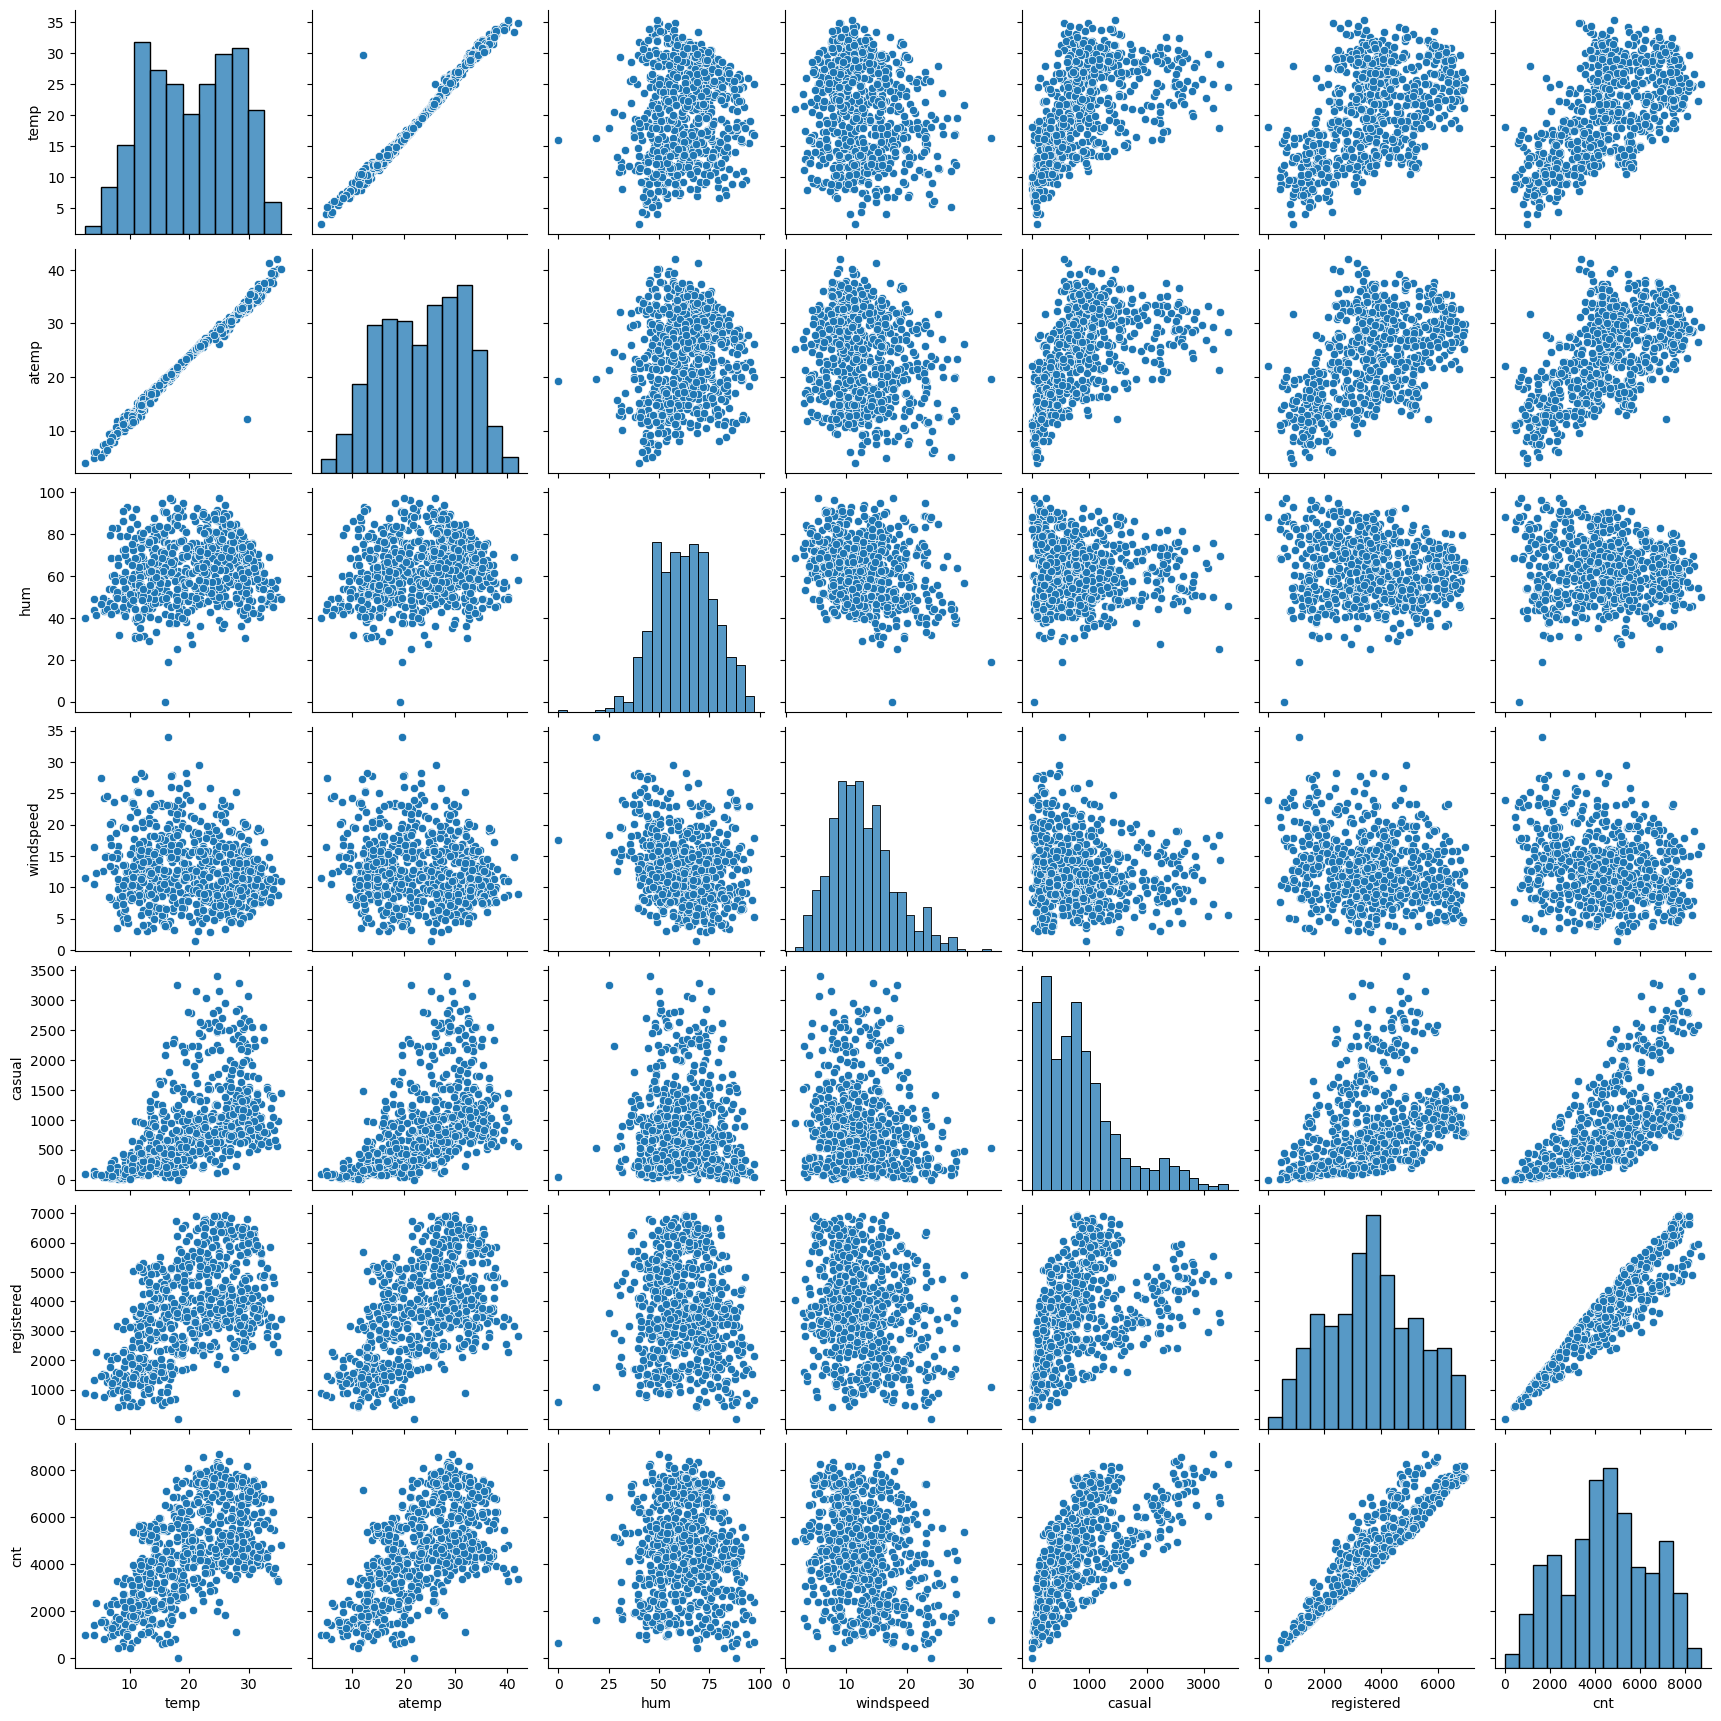

In [233]:
# Visualising numerical variables

sns.pairplot(day1[["temp",'atemp',"hum","windspeed","casual","registered","cnt"]])
plt.show()

### Inferences from above plot:
1) temp and atemp have very high correlation sp we can eliminate one
2) There is some correlation between cnt and variables like temp, atemp, casual and registered so a multiple linear regression model is possible and should give us good insights about data

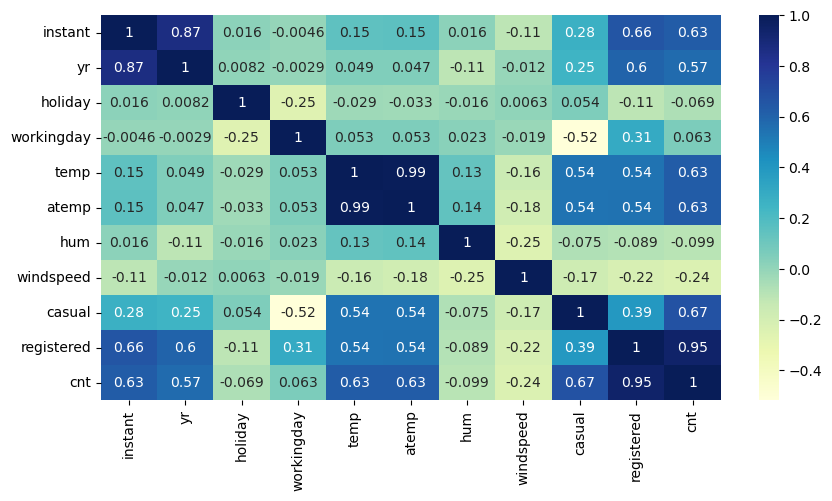

In [234]:
# Check correlations between numerical variables
plt.figure(figsize = (10, 5))
sns.heatmap(day1.corr(),annot=True,cmap="YlGnBu")
plt.show()

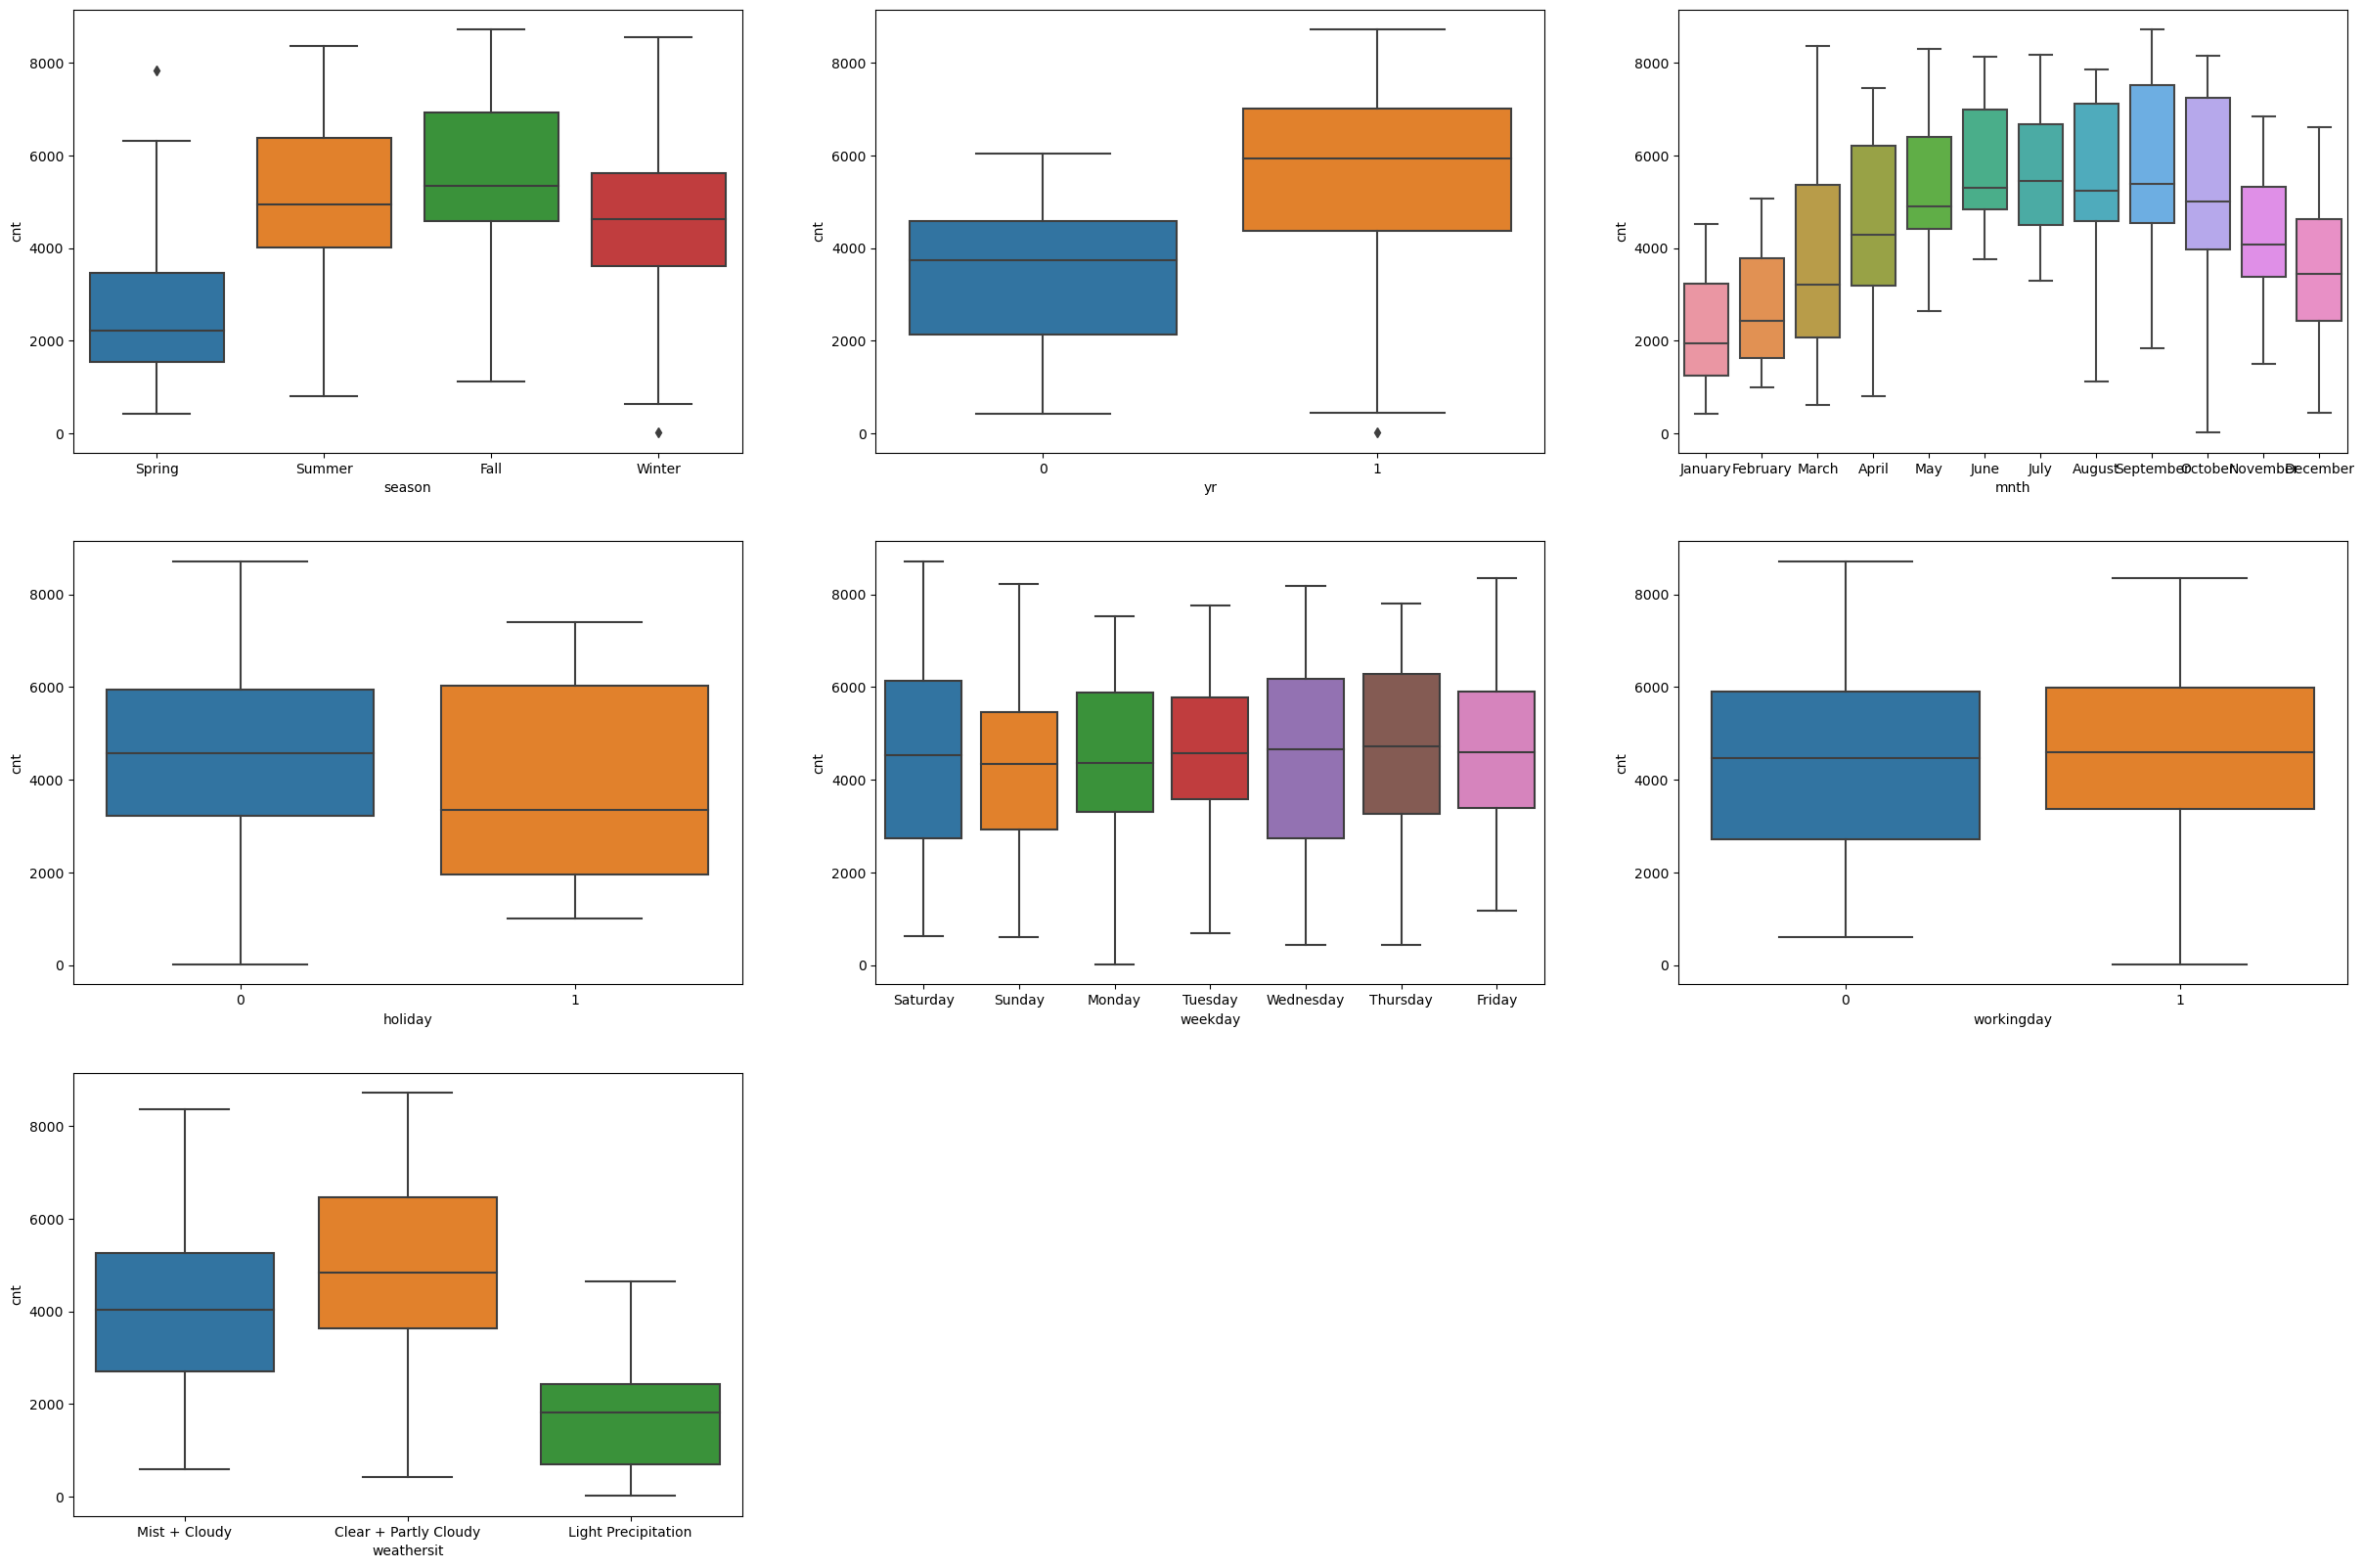

In [235]:
# Creating sub plots to visualize categorical data

plt.figure(figsize=(30, 20))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day1)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day1)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day1)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day1)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day1)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day1)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day1)


plt.show()

### Inferences from above plots
1) Count is signifgicantly higher in summer and spring
2) count for more in the year 2019
3) Count is higher in Cler+ Partly Cloudy and Mist+ Cloudy conditions

### Step 4: Cleaning Data

Dropping columns which may not be of any value:
- instant: record index
- dteday : date - Since year, month are already present
- temp : Since we already have atemp which may be a better variable to represent as actual temperature
- casual and registered: Since these consolidate to cnt

In [236]:
day1.drop(["instant","dteday","temp","casual","registered"],axis=1,inplace=True)
day1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


In [237]:
# Creating dummy variables for categorical variables

day2 = pd.get_dummies(day1,columns=["season","mnth","weekday","weathersit"],drop_first=True)
day2.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


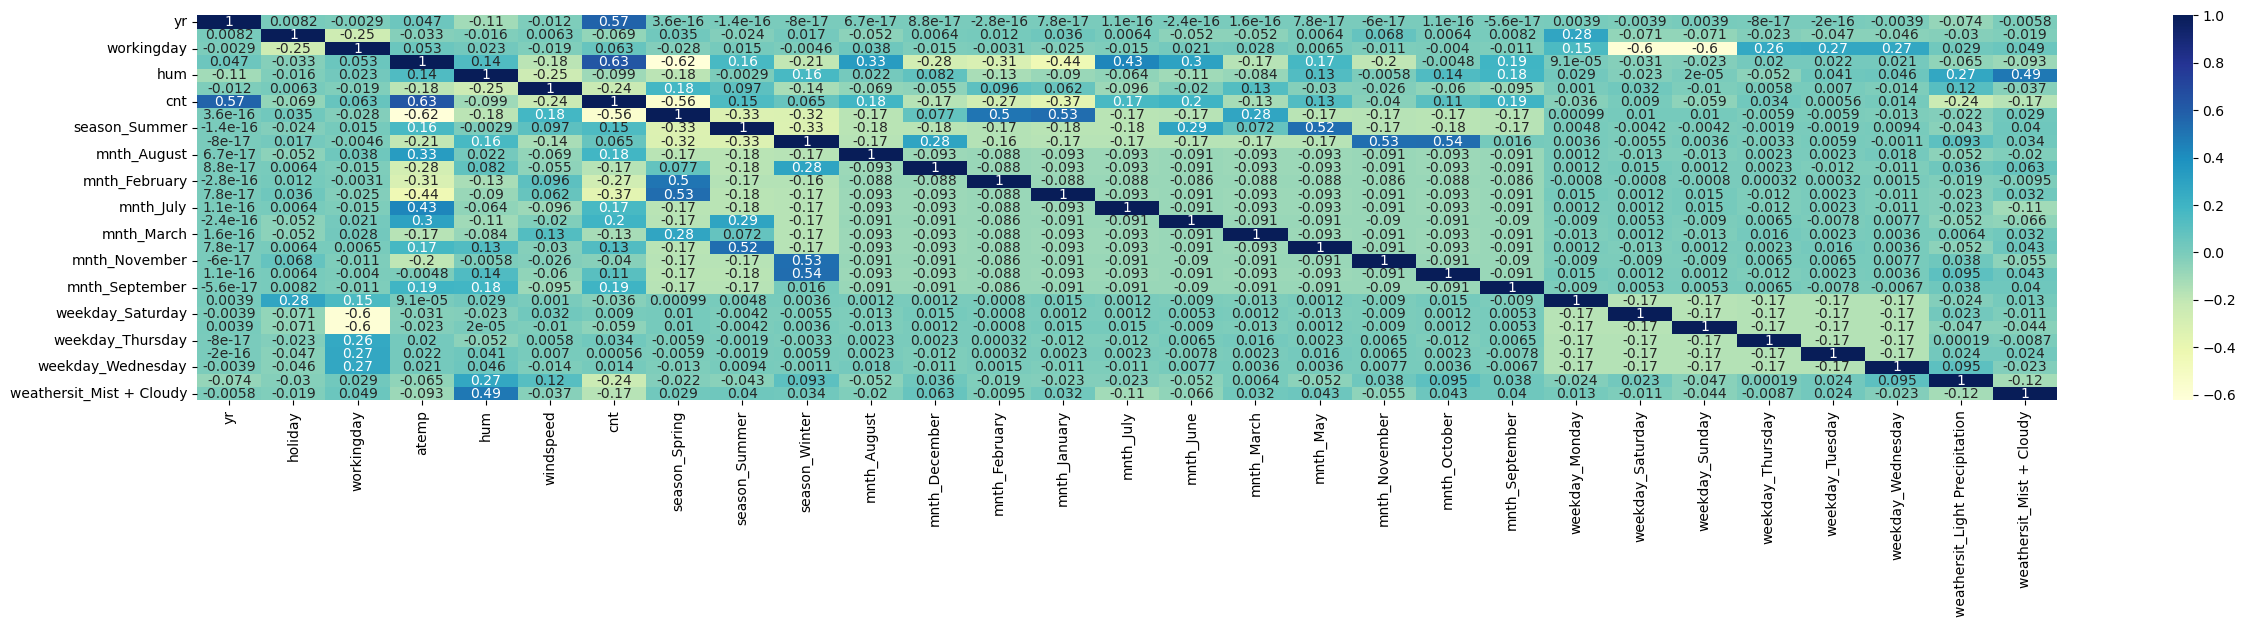

In [238]:
#Checking heat map once again to see correlation between the new data which has been added after ading dummy variables
plt.figure(figsize = (30, 5))
sns.heatmap(day2.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [239]:
# Since all comumns are now have numeric data, we shall convert them into numeric data
day2 = day2.apply(pd.to_numeric)
day2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_Spring                   730 non-null    uint8  
 8   season_Summer                   730 non-null    uint8  
 9   season_Winter                   730 non-null    uint8  
 10  mnth_August                     730 non-null    uint8  
 11  mnth_December                   730 non-null    uint8  
 12  mnth_February                   730 

### Step 5: Creating train and test sets based on 70% and 30% ratio

In [240]:
df_train, df_test = train_test_split(day2, train_size = 0.7, test_size = 0.3, random_state = 100)

#Check Training data shape
print(df_train.shape)

# Check test data shape
print(df_test.shape)

(510, 29)
(219, 29)


In [241]:
# Rescaling atemp, hum, windspeed and cnt since the data has numeric values ranging in values 

scaler = MinMaxScaler()
df_train[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(df_train[['atemp','hum','windspeed','cnt']])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [242]:
# Rescaling the same in the test set as well
df_test[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(df_test[['atemp','hum','windspeed','cnt']])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.778767,0.534223,0.149393,0.704300,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.855132,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.492359,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.805661,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.749249,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Dividing into X and Y sets for the model building

In [243]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 6: Building a model using Recursive Feature Elimination (RFE)

In [244]:
# Running RFE with the output number of the variable equal to 13

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [245]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 6),
 ('season_Winter', True, 1),
 ('mnth_August', False, 7),
 ('mnth_December', False, 3),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 8),
 ('mnth_March', False, 14),
 ('mnth_May', False, 5),
 ('mnth_November', False, 2),
 ('mnth_October', False, 13),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Precipitation', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [246]:
# Checking the columns which should be discarded as per the algorithm

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_January', 'mnth_July',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Precipitation', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [247]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [248]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [249]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [250]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [251]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.66e-188
Time:                        10:36:29   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### holiday is insignificant in presence of other variables; can be dropped

In [252]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [253]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [254]:
# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.66e-188
Time:                        10:36:29   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [255]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [256]:
# Calculate the VIFs for the model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.98
2,atemp,18.21
1,workingday,17.13
10,weekday_Saturday,4.62
4,windspeed,4.51
11,weekday_Sunday,4.49
5,season_Spring,3.05
13,weathersit_Mist + Cloudy,2.28
6,season_Winter,2.11
0,yr,2.08


In [257]:
# Dropping hum since the VIF is very high
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.51e-186
Time:                        10:36:29   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [258]:
#Checking VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.71
2,atemp,12.74
3,windspeed,4.50
9,weekday_Saturday,3.90
10,weekday_Sunday,3.66
4,season_Spring,2.81
0,yr,2.07
5,season_Winter,1.75
6,mnth_January,1.65
12,weathersit_Mist + Cloudy,1.58


In [259]:
# Dropping hum since the VIF is very high
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.35e-184
Time:                        10:36:31   Log-Likelihood:                 495.47
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     497   BIC:                            -909.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [260]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.66
2,windspeed,3.95
3,season_Spring,2.25
0,yr,2.06
5,mnth_January,1.60
11,weathersit_Mist + Cloudy,1.53
4,season_Winter,1.41
6,mnth_July,1.35
8,weekday_Saturday,1.22
9,weekday_Sunday,1.21


In [261]:
#Variable weekday_Saturday has a significantly higher VIF, we can drop it

X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.14e-185
Time:                        10:36:31   Log-Likelihood:                 494.56
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     498   BIC:                            -914.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [262]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.60
2,windspeed,3.91
3,season_Spring,2.24
0,yr,2.06
5,mnth_January,1.60
10,weathersit_Mist + Cloudy,1.53
4,season_Winter,1.40
6,mnth_July,1.35
7,mnth_September,1.20
8,weekday_Sunday,1.17


- The p values for all variables now looks okay and also the VIF values indicate that there is a low chance of multi colinearity
- We can consider the above model with following variables as final:
-- atemp
-- windspeed
--season_Spring
-- yr
-- mnth_January
-- weathersit_Mist + Cloudy
-- season_Winter
-- mnth_July	
-- mnth_September	
-- weekday_Sunday	
-- weathersit_Light Precipitation

### Step 7: Residual Analysis of the train data
Let us plot the histogram of the error terms and see what it looks like and to check if the error terms are also normally distributed

In [263]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

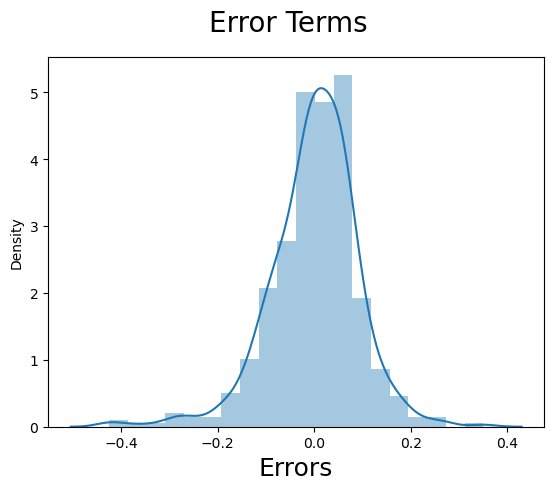

In [264]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                         

### Step 8: Making predictions

In [271]:
y_test = df_test.pop('cnt')
X_test = df_test

In [272]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

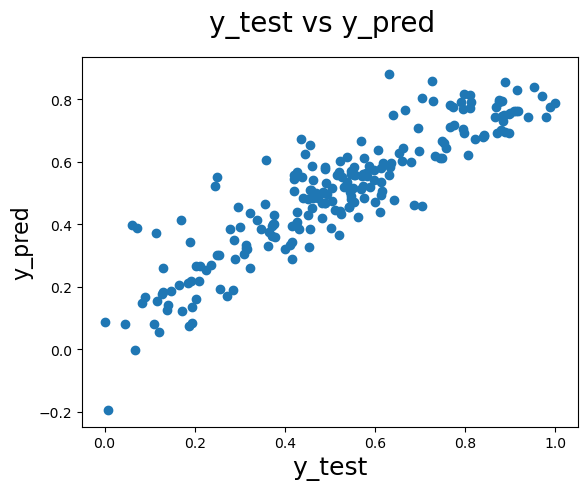

In [273]:
### Model evaluatioln

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)                        

In [274]:
#Checking r-squared and adjusted r-squared values for the test model
r2 = r2_score(y_test, y_pred)
print(r2)
Adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-10-1))
print(Adj_r2)

0.7978155568642218
0.7880951509442324


R-squared and Adjusted r-squared values on train and test are comparable and we can say that the model is a decent to good fit

Based on the model we can now make a prediction on the variable cnt using the following equation:


cnt  = 0.2738 + 0.2361 * yr + 0.4452 * atemp -0.1364 * windspeed -0.1094 * season_Spring +0.0343 * season_Winter -0.0443 * mnth_January -0.0616 * mnth_July +0.0559 * mnth_September -0.0455 * weekday_Sunday 
-0.2841 * weathersit_Light Precipitation -0.0807 * weathersit_Mist + Cloudy             

### Conclusions from the above equation
- cnt is 23.6% more in year 2019
- cnt is 44.52% more with every unit increase in atemp
- cnt is 10.9% lower in spring
- cnt is roughly 3% more in winters
- cnt is roughly 4% and 6% lower in January and July respectively
- cnt is 5.6% higher in September
- cnt is 4.5% lower on Sundays
- cnt is lower there is light precicipation or there is mist and it is cloudy